# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [32]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [40]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request and convert the response to JSON
        response = requests.get(city_url).json()

        # Parse the JSON and retrieve data
        city_weather = {
            "city": city,
            "temperature": response["main"]["temp"],
            "humidity": response["main"]["humidity"],
            "description": response["weather"][0]["description"]
        }

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | quelimane
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | hihifo
City not found. Skipping...
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | wagga wagga
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | birjand
Processing Record 9 of Set 1 | ust-nera
Processing Record 10 of Set 1 | cabo san lucas
Processing Record 11 of Set 1 | sabang
Processing Record 12 of Set 1 | papatowai
Processing Record 13 of Set 1 | vorgashor
Processing Record 14 of Set 1 | mossendjo
Processing Record 15 of Set 1 | arvayheer
Processing Record 16 of Set 1 | zalesovo
Processing Record 17 of Set 1 | tadine
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record 19 of Set 1 | auburn
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | tiassale
Processing Record 22 

In [39]:
print(city_data)

[{'City': 'silifke', 'Lat': 36.3778, 'Lng': 33.9344, 'Max Temp': 300.57, 'Humidity': 35, 'Cloudiness': 100, 'Wind Speed': 1.01, 'Country': 'TR', 'Date': 1698647878}]


In [41]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [42]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,284.59,77,6,2.68,NZ,1698648374
1,quelimane,-17.8786,36.8883,301.12,74,75,11.83,MZ,1698648375
2,port-aux-francais,-49.3500,70.2167,275.16,62,86,14.51,TF,1698648375
3,adamstown,-25.0660,-130.1015,295.84,83,100,4.23,PN,1698648375
4,wagga wagga,-35.1167,147.3667,296.70,29,100,9.16,AU,1698648375


In [43]:


# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [44]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,284.59,77,6,2.68,NZ,1698648374
1,quelimane,-17.8786,36.8883,301.12,74,75,11.83,MZ,1698648375
2,port-aux-francais,-49.3500,70.2167,275.16,62,86,14.51,TF,1698648375
3,adamstown,-25.0660,-130.1015,295.84,83,100,4.23,PN,1698648375
4,wagga wagga,-35.1167,147.3667,296.70,29,100,9.16,AU,1698648375


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

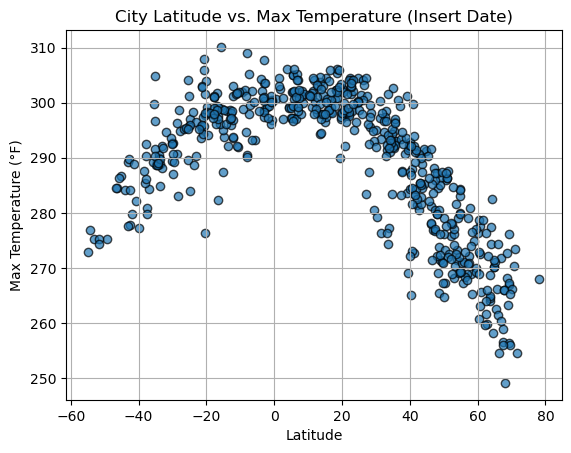

In [45]:
# Create a scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.7)

# Set graph properties
plt.title("City Latitude vs. Max Temperature (Insert Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show the plot
plt.show()

#### Latitude Vs. Humidity

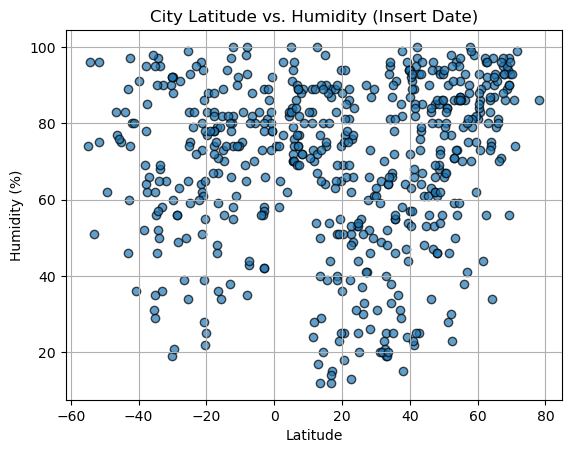

In [46]:
# Create a scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.7)

# Set graph properties
plt.title("City Latitude vs. Humidity (Insert Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show the plot
plt.show()

#### Latitude Vs. Cloudiness

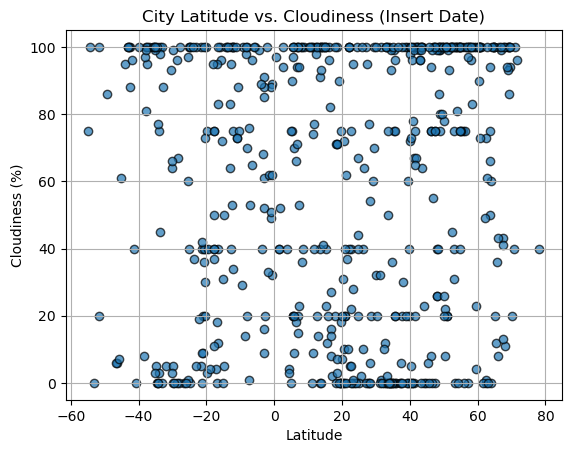

In [47]:
# Create a scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.7)

# Set graph properties
plt.title("City Latitude vs. Cloudiness (Insert Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show the plot
plt.show()

#### Latitude vs. Wind Speed Plot

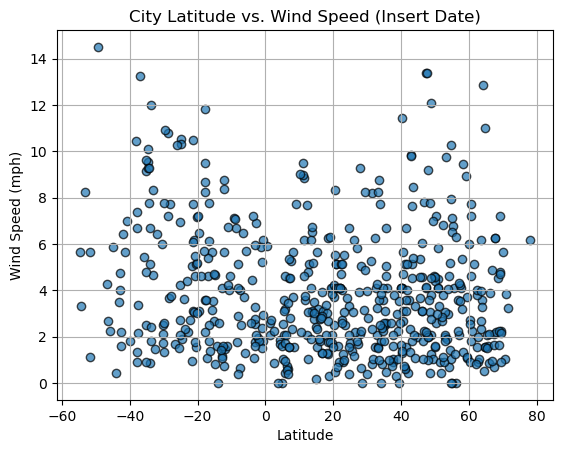

In [48]:
# Create a scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.7)

# Set graph properties
plt.title("City Latitude vs. Wind Speed (Insert Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show the plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [49]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create scatter plot
    plt.scatter(x_values, y_values, marker="o", edgecolors='k', alpha=0.75)

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-", label=line_eq)

    # Annotate the linear equation on the plot
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    # Label the plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Display the correlation coefficient
    plt.annotate(f"R-squared = {round(rvalue**2, 2)}", (min(x_values), min(y_values)), fontsize=12, color="blue")

    # Show the plot
    plt.legend()
    plt.show()


In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,jamestown,42.0970,-79.2353,281.49,100,100,0.45,US,1698648092
6,birjand,32.8663,59.2211,298.41,19,0,2.06,IR,1698648376
7,ust-nera,64.5667,143.2000,258.10,97,100,0.51,RU,1698648315
8,cabo san lucas,22.8909,-109.9124,298.43,76,0,0.89,MX,1698648364
9,sabang,5.8933,95.3214,300.69,76,70,3.18,ID,1698648377


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,284.59,77,6,2.68,NZ,1698648374
1,quelimane,-17.8786,36.8883,301.12,74,75,11.83,MZ,1698648375
2,port-aux-francais,-49.3500,70.2167,275.16,62,86,14.51,TF,1698648375
3,adamstown,-25.0660,-130.1015,295.84,83,100,4.23,PN,1698648375
4,wagga wagga,-35.1167,147.3667,296.70,29,100,9.16,AU,1698648375


###  Temperature vs. Latitude Linear Regression Plot

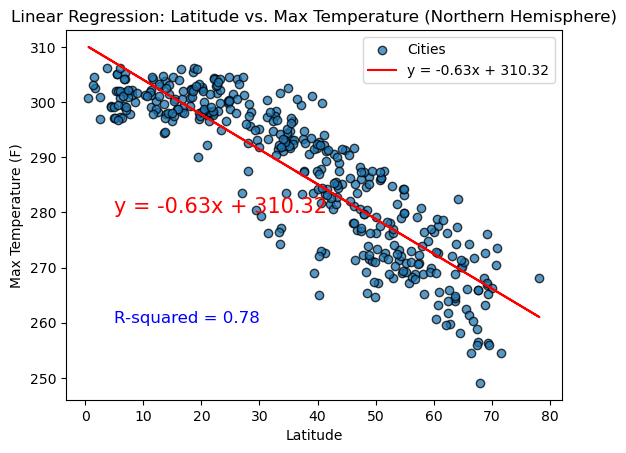

In [56]:
# Linear regression on Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Define x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate the regression values
regress_values = x_values * slope + intercept

# Create a line equation string
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o", edgecolors='k', alpha=0.75, label="Cities")

# Plot the regression line
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Annotate the linear equation on the plot
plt.annotate(line_eq, (5, 280), fontsize=15, color="red")

# Label the plot
plt.title("Linear Regression: Latitude vs. Max Temperature (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Display the correlation coefficient
plt.annotate(f"R-squared = {round(rvalue**2, 2)}", (5, 260), fontsize=12, color="blue")

# Show the plot
plt.legend()
plt.show()


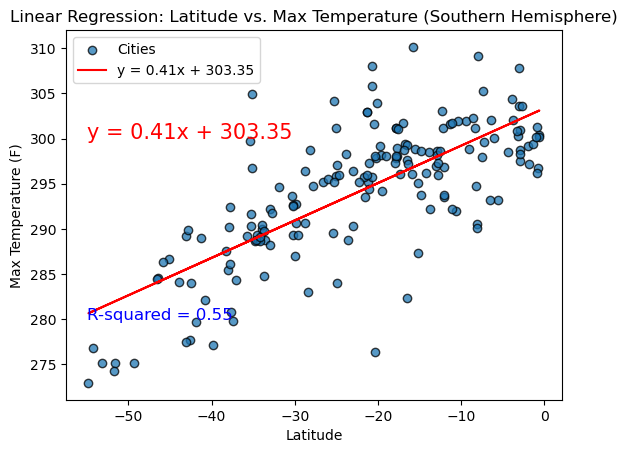

In [57]:
# Linear regression on Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Define x and y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate the regression values
regress_values = x_values * slope + intercept

# Create a line equation string
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o", edgecolors='k', alpha=0.75, label="Cities")

# Plot the regression line
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Annotate the linear equation on the plot
plt.annotate(line_eq, (-55, 300), fontsize=15, color="red")

# Label the plot
plt.title("Linear Regression: Latitude vs. Max Temperature (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Display the correlation coefficient
plt.annotate(f"R-squared = {round(rvalue**2, 2)}", (-55, 280), fontsize=12, color="blue")

# Show the plot
plt.legend()
plt.show()





**Discussion about the linear relationship:** 
Northern Hemisphere: R-squared value ≈ 0.78
Southern Hemisphere: R-squared value ≈ 0.55
Both models show a positive relationship between latitude and max temperature, with the Northern Hemisphere model having a stronger fit to the data.

### Humidity vs. Latitude Linear Regression Plot

R-squared = 0.0572


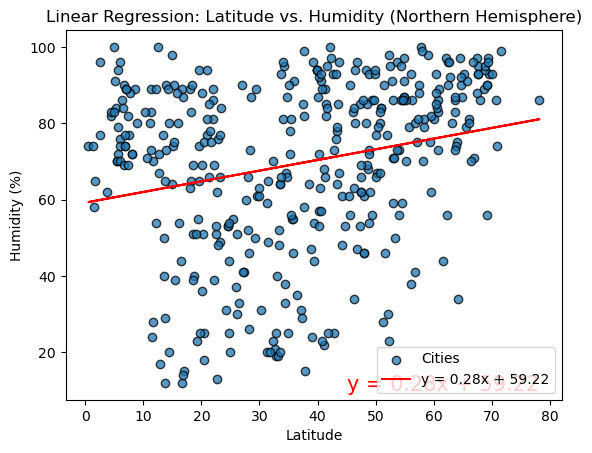

In [65]:
# Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Define x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate the regression values
regress_values = x_values * slope + intercept

# Create a line equation string
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o", edgecolors='k', alpha=0.75, label="Cities")

# Plot the regression line
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Annotate the linear equation and R-squared value on the plot
annotation = f"R-squared = {round(rvalue**2, 2)}"
plt.annotate(line_eq, (45, 10), fontsize=15, color="red")
plt.annotate(annotation, (45, 5), fontsize=12, color="blue")

# Label the plot
plt.title("Linear Regression: Latitude vs. Humidity (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"R-squared = {rvalue**2:.4f}")
# Show the plot
plt.legend()
plt.show()

R-squared = 0.0020


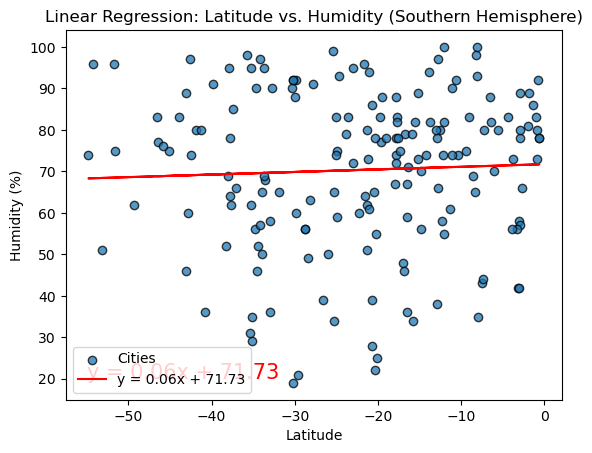

In [64]:
# Southern Hemisphere

southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Define x and y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate the regression values
regress_values = x_values * slope + intercept

# Create a line equation string
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o", edgecolors='k', alpha=0.75, label="Cities")

# Plot the regression line
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Annotate the linear equation on the plot
plt.annotate(line_eq, (-55, 20), fontsize=15, color="red")

# Label the plot
plt.title("Linear Regression: Latitude vs. Humidity (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Display the correlation coefficient
plt.annotate(f"R-squared = {round(rvalue**2, 2)}", (-55, 10), fontsize=12, color="blue")

# Show the plot
plt.legend()

# Print the R-squared value
print(f"R-squared = {rvalue**2:.4f}")

# Display the plot
plt.show()


**Discussion about the linear relationship:** 
Northern Hemisphere: R-squared value ≈ 0.0572
Southern Hemisphere: R-squared value ≈ 0.0020
The values are relatively low, suggesting that there is only a weak linear relationship between latitude and humidity. The models explain a small portion of the variance in humidity with respect to latitude, and the relationship is not very strong.

### Cloudiness vs. Latitude Linear Regression Plot

R-squared = 0.0353


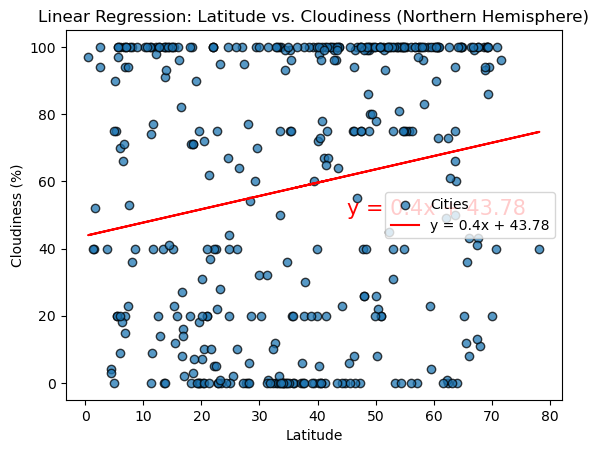

In [68]:
# Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Define x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate the regression values
regress_values = x_values * slope + intercept

# Create a line equation string
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o", edgecolors='k', alpha=0.75, label="Cities")

# Plot the regression line
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Annotate the linear equation on the plot
plt.annotate(line_eq, (45, 50), fontsize=15, color="red")

# Label the plot
plt.title("Linear Regression: Latitude vs. Cloudiness (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Display the correlation coefficient
print(f"R-squared = {rvalue**2:.4f}")
# Show the plot
plt.legend()
plt.show()


R-squared = 0.0006


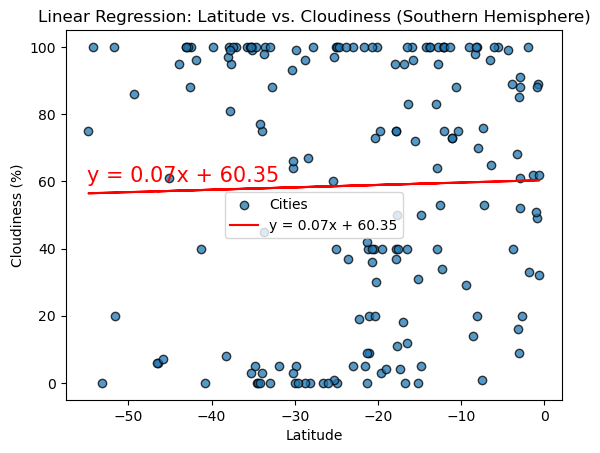

In [69]:
# Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Define x and y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate the regression values
regress_values = x_values * slope + intercept

# Create a line equation string
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o", edgecolors='k', alpha=0.75, label="Cities")

# Plot the regression line
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Annotate the linear equation on the plot
plt.annotate(line_eq, (-55, 60), fontsize=15, color="red")

# Label the plot
plt.title("Linear Regression: Latitude vs. Cloudiness (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Display the correlation coefficient
print(f"R-squared = {rvalue**2:.4f}")
# Show the plot
plt.legend()
plt.show()


**Discussion about the linear relationship:** 
Northern Hemisphere: R-squared value ≈ 0.0353
Southern Hemisphere: R-squared value ≈ 0.0006
The values are relatively low, suggesting that there is only a weak linear relationship between latitude and cloudiness. The models explain a small portion of the variance in cloudiness with respect to latitude, and the relationship is not very strong.

### Wind Speed vs. Latitude Linear Regression Plot

R-squared = 0.0058


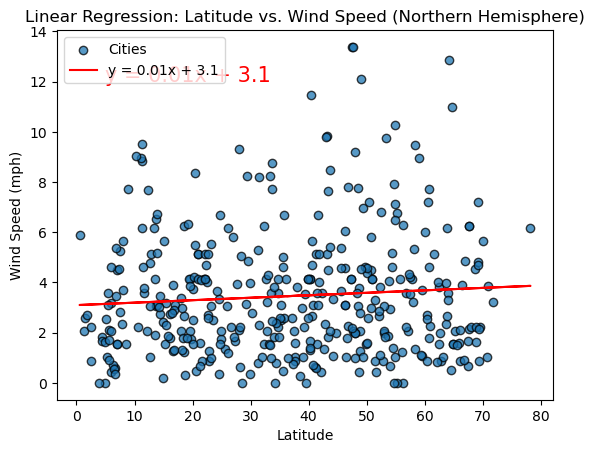

In [70]:
# Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Define x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate the regression values
regress_values = x_values * slope + intercept

# Create a line equation string
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o", edgecolors='k', alpha=0.75, label="Cities")

# Plot the regression line
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Annotate the linear equation on the plot
plt.annotate(line_eq, (5, 12), fontsize=15, color="red")

# Label the plot
plt.title("Linear Regression: Latitude vs. Wind Speed (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Display the correlation coefficient
print(f"R-squared = {rvalue**2:.4f}")

# Show the plot
plt.legend()
plt.show()


R-squared = 0.0450


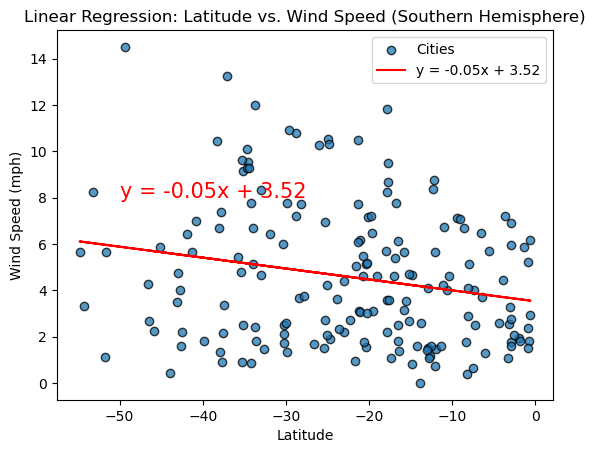

In [71]:
# Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Define x and y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate the regression values
regress_values = x_values * slope + intercept

# Create a line equation string
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create the scatter plot
plt.scatter(x_values, y_values, marker="o", edgecolors='k', alpha=0.75, label="Cities")

# Plot the regression line
plt.plot(x_values, regress_values, "r-", label=line_eq)

# Annotate the linear equation on the plot
plt.annotate(line_eq, (-50, 8), fontsize=15, color="red")

# Label the plot
plt.title("Linear Regression: Latitude vs. Wind Speed (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Display the correlation coefficient
print(f"R-squared = {rvalue**2:.4f}")

# Show the plot
plt.legend()
plt.show()


**Discussion about the linear relationship:** 
Northern Hemisphere: R-squared value ≈ 0.0058
Southern Hemisphere: R-squared value ≈ 0.0450
The values are relatively low, suggesting that there is only a weak linear relationship between latitude and wind speed. The models explain a small portion of the variance in wind speed with respect to latitude, and the relationship is not very strong.